In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sl

import matplotlib
matplotlib.style.use('ggplot')

%matplotlib inline

In [310]:
N = 10
c1 = np.random.multivariate_normal([2, 3], [[1, 1], [0, 1]], N)
c2 = np.random.multivariate_normal([10, 20], [[1, 0.5], [0, 2]], N)

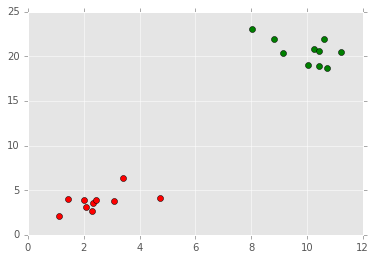

In [311]:
plt.plot(c1[:,0], c1[:,1], 'ro')
plt.plot(c2[:,0], c2[:,1], 'go')

In [312]:
np.insert(c1, 2, 1, axis=1)

array([[ 1.44845551,  3.95464295,  1.        ],
       [ 2.28849875,  2.65523318,  1.        ],
       [ 2.01327859,  3.9291741 ,  1.        ],
       [ 3.08091524,  3.75837156,  1.        ],
       [ 1.10885937,  2.11141104,  1.        ],
       [ 3.39945796,  6.3900881 ,  1.        ],
       [ 2.33066868,  3.56486905,  1.        ],
       [ 2.43079576,  3.91937442,  1.        ],
       [ 2.07467636,  3.08407022,  1.        ],
       [ 4.73558539,  4.08537812,  1.        ]])

In [313]:
df = pd.DataFrame(np.concatenate((np.insert(c1, 2, 0, axis=1), np.insert(c2, 2, 1, axis=1))), columns=['x', 'y', 'class'])
df.head()

,x,y,class
0,1.448456,3.954643,0.0
1,2.288499,2.655233,0.0
2,2.013279,3.929174,0.0
3,3.080915,3.758372,0.0
4,1.108859,2.111411,0.0


In [314]:
import sklearn.linear_model as slm
perceptron = slm.Perceptron(random_state=241)

In [315]:
X_train = df[['x', 'y']]
y_train = df['class']

In [316]:
perceptron.fit(X_train, y_train)
print(perceptron.intercept_)
print(perceptron.coef_)

[-17.]
[[-8.41939378  6.50189095]]


In [317]:
b = perceptron.intercept_[0]
w = perceptron.coef_[0]
def sy(x): return (-(w[0] * x + b) / w[1])

In [320]:
perceptron.predict(X_train)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [318]:
mx = np.max(np.max(X_train.abs()))
ve_x = np.array([-2, 2])
ve_y = sy(ve_x)

(-2.0, 12.0, 0.0, 25.0)

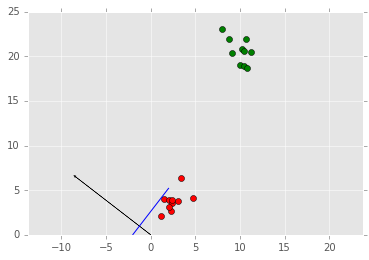

In [319]:
plt.plot(c1[:,0], c1[:,1], 'ro')
plt.plot(c2[:,0], c2[:,1], 'go')
ax = plt.axes()
ax.arrow(0, 0, w[0], w[1], head_width=0.2, head_length=0.25, fc='k', ec='k')
plt.plot(ve_x, ve_y, 'b')
plt.axis('equal')